In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

***
계층 클러스터링(Hierarchical Clustering) 알고리즘은 데이터 간 계층을 기반으로 데이터 간 병합 또는 분할을 통해서 해당 데이터 포인트가 속할 그룹을 결정한다.  
계층 클러스터링은 크게 병합 계층 클러스터링(Agglomerative Hierarchical Clustering)과 분할 계층 클러스터링(Division Hierarchical Clustering) 으로 나눌 수 있다.  
***
- 병합 게층 클러스터링 : 개별 데이터 포인트를 하나의 클러스터로 설정하고 시작하는 방법으로 데이터 포인트가 100가 있다면 처음에 100개의 클러스터가 있다고 존재한다고 가정한다.  
    그리고 각 클러스터를 비교해서 클러스터간 유사도가 높을 경우 두개의 클러스터를 하나의 클러스터로 합치는 방법이다.  
    처음에는 다수의 클러스터로 시작하지만 결국에는 데이터셋 전체를 하나의 클러스터로 묶는 방법이다.
    
    
- 분할 계층 클러스터링 : 병합 계층 클러스터링과는 반대로 전체 데이터셋을 하나의 클러스터로 설정하고 시작하는 방법으로 데이터 포인트가 100개가 있다면  
    이 데이터셋 전체를 1개의 클러스터라 가정하는 것이다.  
    그리고 클러스터 내부에서 가장 멀리 떨어진 데이터 포인트를 다른 클러스터로 분리하는 방법이다.  
    처음에는 하나의 클러스터로 시작하지만 결국에는 클러스터가 데이터 포인트의 갯수만큼 분리되는 방법이다.  

***
계층 클러스터링 알고리즘을 활용해서 주어진 데이터를 클러스터링 해본다.
***
데이터 불러오기

In [2]:
# 클러스터링용 가상 데이터를 불러온다.
x_train, y_train = datasets.make_blobs(n_samples=100, n_features=2, random_state=10, centers=6) 
print(x_train.shape, y_train.shape)

(100, 2) (100,)


***
클러스터링 되지 않은 데이터 시각화
***

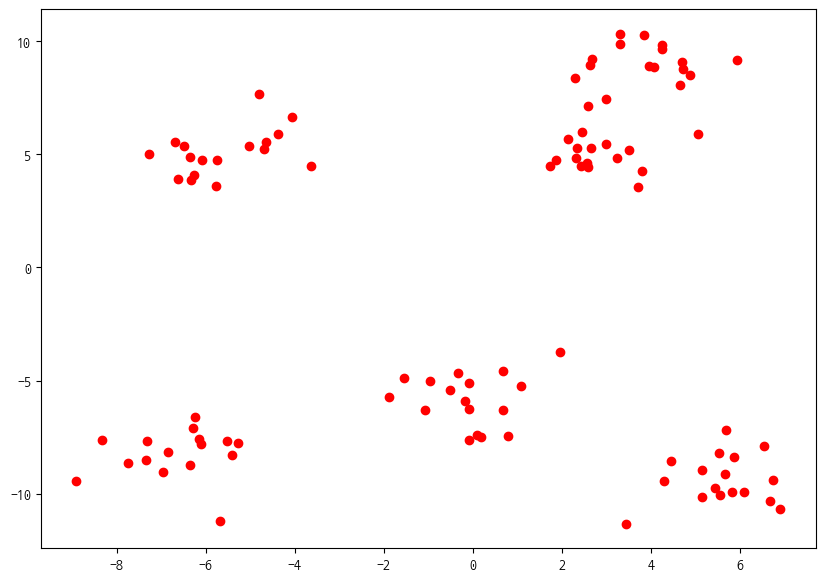

In [3]:
# 클러스터링되지 않은 데이터 시각화
plt.figure(figsize=[10, 7])
plt.scatter(x=x_train[: , 0], y=x_train[:, 1], c="red")
plt.show()

***
병합 계층 클러스터링 모델을 생성 후 학습시킨다.
***

In [4]:
# 병합 계층 클러스터링 알고리즘 사용
from sklearn.cluster import AgglomerativeClustering 

# n_clusters 속성에 클러스터링 갯수를 지정해서 병합 계층 클러스터링 모델을 만든다. 기본값은 2이다. 
# 모든 데이터 포인트가 각각 하나의 클러스터를 구성하는 것을 보고싶으면 n_clusters 속성을 None으로 지정하면 된다. 
# 이때, distance_threshold 속성값을 반드시 0으로 지정하지 않으면 에러가 발생한다!!!!!!!!
# linkage 속성으로 거리를 측정하는 방법을 지정한다. 기본값은 "word"이고, "complete", "average", "single"을 지정할 수 있다.
# "word" : 병합되는 클러스터들의 분산을 최소화한다. 최소 분산 방법
# "complete" : 모든 데이터 조합에 대한 거리를 측정해서 가장 큰 값을 구한다. 최장 거리 방법
# "average" : 모든 데이터 조합에 대한 거리를 측정해서 평균 값을 구한다. 평균 거리 방법
# "single" : 모든 데이터 조합에 대한 거리를 측정해서 가장 작은 값을 구한다. 최소 거리 방법
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="complete")

#학습데이터로 병합 계층 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 얻어올 수 있다.
print(cluster.labels_)
#fit_predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다. 
print(cluster.fit_predict(x_train))

[88 57 75 93 80 92 69 59 76 77 72 99 91 63 82 71 37 66 55 94 81 60 67 35
 87 61 46 83 73 98 54 84 41 62 65 56 43 68 78 64 97 27 49 58 33 52 48 53
 28 38 50 74 79 90 29 95 85 13 96 70 45 34 22 16 40 32 47 86 36 18 30 23
 31 42 26 17 51 39 89 24 25 44 19 21 10 12  8 15 20 11 14  7  9  5  6  3
  4  2  1  0]
[88 57 75 93 80 92 69 59 76 77 72 99 91 63 82 71 37 66 55 94 81 60 67 35
 87 61 46 83 73 98 54 84 41 62 65 56 43 68 78 64 97 27 49 58 33 52 48 53
 28 38 50 74 79 90 29 95 85 13 96 70 45 34 22 16 40 32 47 86 36 18 30 23
 31 42 26 17 51 39 89 24 25 44 19 21 10 12  8 15 20 11 14  7  9  5  6  3
  4  2  1  0]


In [6]:
# n_clusters 속성값을 None이 아닌 값을 지정하려면 distance_threshold 속성을 지정하지 않는다.  
cluster = AgglomerativeClustering(n_clusters=4, linkage="complete")
cluster.fit(x_train)
print(cluster.labels_)
print(cluster.fit_predict(x_train))

[3 1 2 2 0 2 0 0 0 3 1 2 0 3 0 2 1 0 0 0 0 2 3 2 2 2 3 1 0 0 0 3 3 0 3 3 1
 1 3 1 0 0 1 0 0 1 1 3 0 1 0 1 0 3 1 0 0 3 1 0 2 1 1 0 3 2 1 1 1 0 1 1 2 0
 0 2 3 3 1 0 3 2 2 0 0 1 0 1 1 0 1 0 1 1 1 2 1 1 1 1]
[3 1 2 2 0 2 0 0 0 3 1 2 0 3 0 2 1 0 0 0 0 2 3 2 2 2 3 1 0 0 0 3 3 0 3 3 1
 1 3 1 0 0 1 0 0 1 1 3 0 1 0 1 0 3 1 0 0 3 1 0 2 1 1 0 3 2 1 1 1 0 1 1 2 0
 0 2 3 3 1 0 3 2 2 0 0 1 0 1 1 0 1 0 1 1 1 2 1 1 1 1]


***
병합 계층 클러스터링 알고리즘으로 클러스터링된 이미지 시각화
***

In [7]:
# 클러스터링된 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df["label"] = y_train
x_train_df["cluster"] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,-6.086784,4.729827,3,3
1,3.801750,4.278268,1,1
2,-7.330583,-8.494063,4,2
3,-6.107069,-7.818906,4,2
4,5.525562,-8.186965,0,0
...,...,...,...,...
95,-6.950884,-9.024594,4,2
96,2.591843,4.446782,1,1
97,2.992321,5.436981,1,1
98,2.310466,4.854172,1,1


In [8]:
# 레이블과 클러스터링된 레이블의 종류 확인
print(set(x_train_df.label))
print(set(x_train_df.cluster))

{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3}


***
실제 데이터의 레이블 데이터 시각화
***

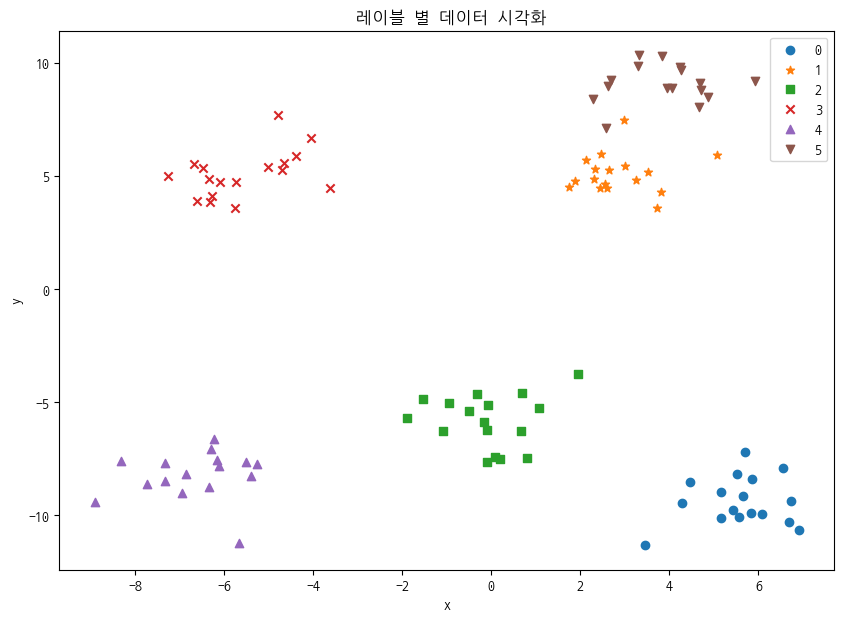

In [9]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.label):
     df_index = x_train_df[x_train_df.label == i] # 원 데이터의 레이블 데이터를 분할한다.
     X = df_index.x # 학습 데이터의 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 학습 데이터의 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label= i ) # 산포도를 그린다.

plt.title(" 레이블 별 데이터 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
병합 계층 클러스터링 된 결과 데이터 시각화
***

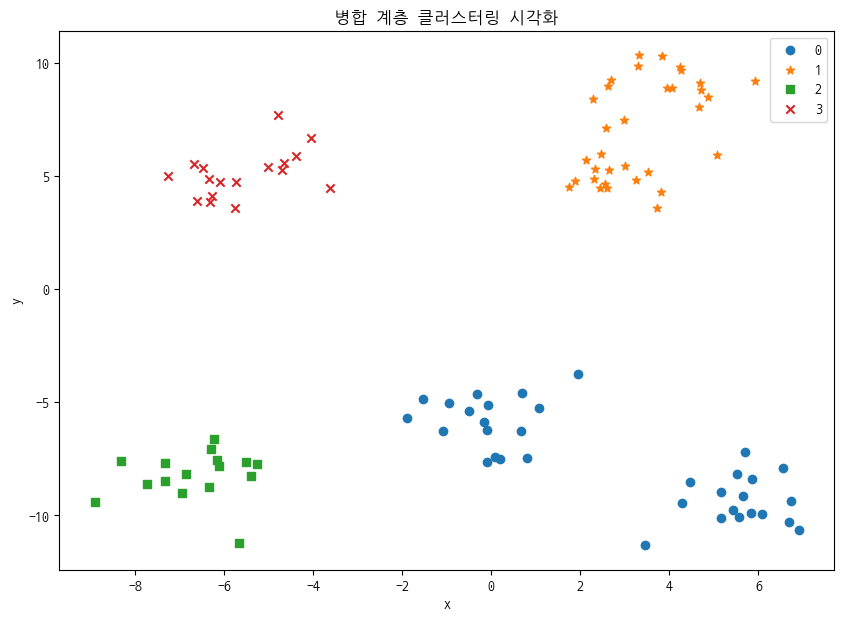

In [10]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.cluster):
     df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과별로 데이터를 분할한다.
     X = df_index.x # 클러스터링 결과에서 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 클러스터링 결과에서 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label=i ) # 산포도를 그린다.

plt.title("병합 계층 클러스터링 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
학습된 모델을 평가한다.
***

In [11]:
# silhouette_score() 메소드에 피쳐 데이터와 군집화 결과로 얻은 클러스터를 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(x_train, cluster.labels_)
print(sil_score)

0.660300244760271


***
덴드로그램(Dendrogram) 시각화
***
계층적 클러스터링 결과를 트리 구조로 나타낸 그림을 덴드로그램이라 한다.

In [12]:
x_train, y_train = datasets.make_blobs(n_samples=10, n_features=2, random_state=10) 
print(x_train.shape, y_train.shape)
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="complete")
cluster.fit(x_train)
print(cluster.labels_)

(10, 2) (10,)
[9 7 8 6 5 3 4 2 1 0]


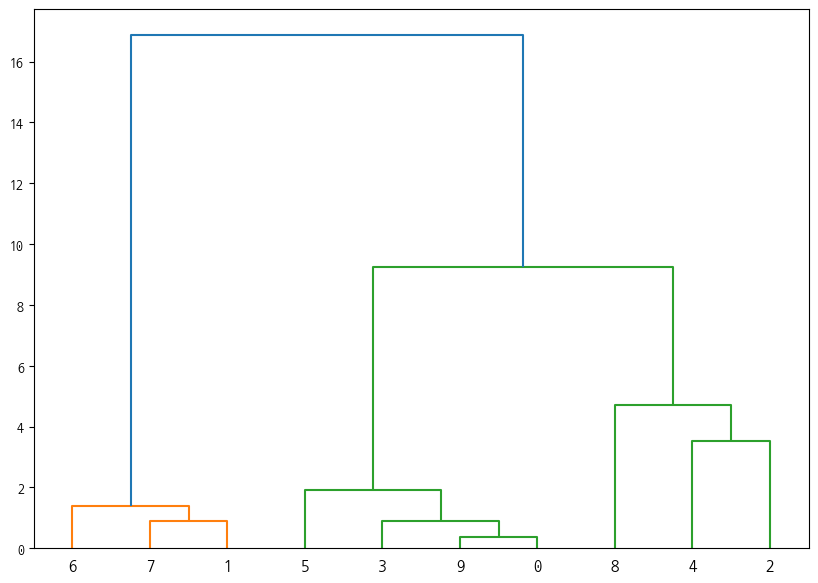

In [13]:
# 덴드로그램 사용
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=[10, 7])
linked = linkage(x_train, "complete")
dendrogram(linked, orientation="top", labels=cluster.labels_)
plt.show()
